In [58]:
from IPython.display import Image
from IPython.core.display import HTML 


In [59]:
%matplotlib inline

In [60]:
import os

import re
import itertools as it
import numpy as np
from razdel import sentenize
from razdel import tokenize
# import pymorphy2
# morph = pymorphy2.MorphAnalyzer()

In [61]:
from nltk.tokenize.toktok import ToktokTokenizer
toktok = ToktokTokenizer()

In [62]:
from collections import Counter, defaultdict

In [63]:
import pickle

In [64]:
#data_path = r'C:\Users\Вячеслав\Documents\Python\ML\2 семестр\LECs\lec4'
# filenames = {r'OpenSubtitles.ru-uk.ru': 'ru', 'OpenSubtitles.ru-uk.uk': 'uk'}
# очень долго!!!
filenames = {r'OpenSubtitles.mk-ru.mk': 'mk', r'OpenSubtitles.mk-ru.ru': 'ru', 'OpenSubtitles.en-ru.en':'en'}

In [65]:
#pickle.dump(file_word_counters, open(os.path.join(data_path, 'os_mk_ru_en.pickle'), 'wb'))

In [66]:
file_word_counters = pickle.load(open(os.path.join('os_mk_ru_en.pickle'), 'rb'))

In [67]:
file_word_counters

{'OpenSubtitles.mk-ru.mk': Counter({'секоја': 2449,
          'епоха': 4,
          'сонува': 64,
          'за': 143056,
          'свој': 560,
          'наследник': 167,
          'во': 163376,
          'овој': 10400,
          'момент': 2742,
          'ние': 14874,
          'како': 72715,
          'нација': 168,
          'ќе': 168834,
          'ги': 65771,
          'достигнеме': 12,
          'ѕвездите': 235,
          'треперам': 11,
          'од': 103893,
          'честа': 213,
          'да': 463682,
          'ја': 85029,
          'објавам': 66,
          'кулминацијата': 4,
          'на': 208677,
          'човечката': 177,
          'долга': 388,
          'историја': 506,
          'интелектуално': 8,
          'и': 188506,
          'научно': 56,
          'достигнување': 36,
          'вчера': 1282,
          'нашата': 3640,
          'моќ': 1079,
          'завладеа': 8,
          'со': 99340,
          'а': 38297,
          'денес': 4107,
          'осветли': 

In [68]:
# Обзор данных:
v = file_word_counters['OpenSubtitles.mk-ru.ru'] 
# k, v
cl = Counter(len(w) for w in v)
cl.most_common()

[(8, 44050),
 (7, 43877),
 (9, 38939),
 (6, 34880),
 (10, 31268),
 (5, 23515),
 (11, 22513),
 (12, 14891),
 (4, 11179),
 (13, 9450),
 (14, 5801),
 (3, 4063),
 (15, 3198),
 (16, 1866),
 (17, 1020),
 (2, 798),
 (18, 572),
 (19, 285),
 (20, 143),
 (21, 96),
 (1, 69),
 (22, 49),
 (23, 34),
 (24, 26),
 (25, 25),
 (26, 19),
 (28, 16),
 (27, 11),
 (31, 11),
 (30, 9),
 (29, 8),
 (33, 6),
 (32, 5),
 (35, 4),
 (37, 3),
 (34, 3),
 (38, 2),
 (43, 1),
 (52, 1),
 (40, 1),
 (39, 1)]

In [69]:
[w for w in v if 2 > len(w) > 0]

['о',
 'в',
 'я',
 'и',
 'с',
 'а',
 'ж',
 'к',
 'у',
 'ы',
 'д',
 'б',
 'i',
 'э',
 'л',
 'е',
 'р',
 'c',
 'ц',
 'g',
 'ч',
 'н',
 'й',
 'a',
 'м',
 'т',
 'ь',
 'o',
 'п',
 'ф',
 'г',
 'p',
 'd',
 'b',
 'ј',
 'ќ',
 'џ',
 'з',
 'ѕ',
 'ю',
 'u',
 's',
 'e',
 'х',
 'à',
 'y',
 'l',
 'm',
 't',
 'ў',
 'x',
 'w',
 'z',
 'ё',
 'f',
 'j',
 'r',
 'k',
 'n',
 'h',
 'ш',
 'ƒ',
 'v',
 'ћ',
 'є',
 'ђ',
 'q',
 'ї',
 'ъ']

In [70]:
v['f']

10

In [71]:
for fn, wc in file_word_counters.items():
    print(f'file: {fn} len: {len(wc)}')

file: OpenSubtitles.mk-ru.mk len: 192659
file: OpenSubtitles.mk-ru.ru len: 292708
file: OpenSubtitles.en-ru.en len: 361005


In [72]:
c3 = Counter('aabbbbcdef')
c5 = Counter(c3)
c3, c5

(Counter({'a': 2, 'b': 4, 'c': 1, 'd': 1, 'e': 1, 'f': 1}),
 Counter({'a': 2, 'b': 4, 'c': 1, 'd': 1, 'e': 1, 'f': 1}))

In [73]:
def lang_dicts_filter(lang_dicts, f_exclude=lambda w, cnt, lng: False, f_action=lambda w, cnt, lng: None, new_counters=False):
    if new_counters:
        result = {}
    else:
        result = lang_dicts
    for lng, wc in lang_dicts.items():
        if new_counters:
            wc = Counter(wc)
        for w, cnt in list(wc.items()):
            if f_exclude(w, cnt, lng):
                wc.pop(w)
            else:
                f_action(w, cnt, lng)
        if new_counters:
            result[lng] = wc        
    return result

In [74]:
# Фильтруем редкие и длинные слова и составляем общий словарь
MIN_WORD_COUNT = 5
MAX_WORD_LENGTH = 20

# меняем ключи словаря на коды языка:
lang_dicts2 = {filenames[fn]: cnt for fn, cnt in file_word_counters.items()}
all_lang_dict2 = defaultdict(list)
lang_dicts2 = lang_dicts_filter(lang_dicts2, 
                               f_exclude=lambda w, cnt, lng: cnt <= MIN_WORD_COUNT or len(w) > MAX_WORD_LENGTH,
                               f_action=lambda w, cnt, lng: all_lang_dict2[w].append((lng, cnt)),
                               new_counters=True)

In [75]:
# свойства словарей-счетчиков после фильтрации:
for ln, wc in lang_dicts2.items():
    print(f'file: {ln} len: {len(wc)}')

file: mk len: 51001
file: ru len: 71196
file: en len: 108330


In [76]:
#len(all_lang_dict),
len(all_lang_dict2)

223687

In [77]:
# Фильтруем пересекающиеся слова:
multilang_set = set(w for w, lng in all_lang_dict2.items() if len(lng) > 1)

lang_dicts2 = lang_dicts_filter(lang_dicts2, 
                               f_exclude=lambda w, cnt, lng:  w in multilang_set)

In [78]:
# свойства словарей-счетчиков после фильтрации:
for ln, wc in lang_dicts2.items():
    print(f'file: {ln} len: {len(wc)}')

file: mk len: 44626
file: ru len: 64877
file: en len: 107542


In [79]:
langs_final = ['ru', 'mk']

# меняем ключи словаря на коды языка:
lang_dicts3 = {ln: wc for ln, wc in lang_dicts2.items() if ln in langs_final}

def gen_alphabet_counter():
    alph_cnt = Counter()
    def alph_counter(w, cnt, lng):
        nonlocal alph_cnt
        alph_cnt += Counter(w)    
    return alph_cnt, alph_counter
alphabet_cnt, alphabet_counter = gen_alphabet_counter()
lang_dicts3 = lang_dicts_filter(lang_dicts3, f_action=alphabet_counter)
print(alphabet_cnt.most_common())

[('а', 87280), ('е', 72598), ('о', 71688), ('и', 66378), ('т', 56429), ('н', 50673), ('р', 50281), ('с', 41896), ('л', 37065), ('в', 35541), ('п', 29712), ('к', 28722), ('м', 25938), ('у', 25051), ('д', 24813), ('з', 15721), ('б', 14304), ('г', 11853), ('ь', 11236), ('я', 10756), ('ш', 10306), ('ч', 10196), ('ы', 9407), ('й', 7685), ('ж', 7167), ('ј', 5435), ('ц', 5338), ('х', 5204), ('ю', 4463), ('ф', 3394), ('э', 1835), ('щ', 1765), ('њ', 1627), ('ё', 1321), ('o', 1012), ('a', 770), ('ќ', 670), ('e', 609), ('џ', 504), ('c', 333), ('p', 311), ('ѓ', 290), ('ъ', 239), ('ѕ', 179), ('љ', 161), ('y', 105), ('m', 97), ('t', 69), ('x', 57), ('ƒ', 56), ('ћ', 51), ('i', 40), ('b', 36), ('k', 35), ('h', 35), ('j', 32), ('є', 29), ('r', 26), ('ι', 25), ('s', 21), ('l', 20), ('n', 20), ('ı', 10), ('g', 9), ('u', 8), ('d', 8), ('f', 6), ('z', 5), ('v', 5), ('ў', 4), ('ѐ', 3), ('w', 3), ('ѝ', 2), ('è', 2), ('é', 2), ('κ', 1), ('ђ', 1), ('ž', 1), ('q', 1), ('і', 1), ('τ', 1)]


In [80]:
MIN_SYMBOL_COUNT = 100
alphabet_cnt_flt = Counter({s: cnt for s, cnt in alphabet_cnt.items() if cnt > MIN_SYMBOL_COUNT})
# print(alphabet_cnt_flt.most_common())
alphabet_set = set(alphabet_cnt_flt)

lang_dicts4 = lang_dicts_filter(lang_dicts3, 
                               f_exclude=lambda w, cnt, lng:  len(set(w) - alphabet_set) > 0,
                               new_counters=True)

alphabet_cnt_f, alphabet_counter_f = gen_alphabet_counter()
lang_dicts4 = lang_dicts_filter(lang_dicts4, f_action=alphabet_counter_f)
print(alphabet_cnt_f.most_common())
# w = 'мфвфыfа'
# len(set(w) - alphabet_set) > 0, set(w) - alphabet_set

[('а', 87161), ('е', 72461), ('о', 71509), ('и', 66232), ('т', 56300), ('н', 50571), ('р', 50211), ('с', 41835), ('л', 36981), ('в', 35484), ('п', 29689), ('к', 28662), ('м', 25870), ('у', 25012), ('д', 24764), ('з', 15710), ('б', 14260), ('г', 11826), ('ь', 11133), ('я', 10743), ('ш', 10273), ('ч', 10167), ('ы', 9395), ('й', 7647), ('ж', 7119), ('ј', 5426), ('ц', 5335), ('х', 5203), ('ю', 4453), ('ф', 3389), ('э', 1823), ('щ', 1763), ('њ', 1627), ('ё', 1318), ('o', 873), ('ќ', 668), ('a', 661), ('e', 527), ('џ', 503), ('c', 306), ('ѓ', 290), ('p', 283), ('ъ', 239), ('ѕ', 177), ('љ', 159), ('y', 100)]


In [81]:
# кодирование символов

# Добавляем перым пустой символ (кодируем его подчеркиванием):
alphabet_cnt_f['_'] = alphabet_cnt_f.most_common()[0][1] **2
code_symb_to_ind = {s: i for i, (s, cnt) in enumerate(alphabet_cnt_f.most_common())}
CODE_LEN = len(code_symb_to_ind)
code_ind_to_symb = {i: s for s, i in code_symb_to_ind.items()}
# code_symb_to_vec = {}
# code_vec_to_symb = 
code_symb_to_ind

{'_': 0,
 'а': 1,
 'е': 2,
 'о': 3,
 'и': 4,
 'т': 5,
 'н': 6,
 'р': 7,
 'с': 8,
 'л': 9,
 'в': 10,
 'п': 11,
 'к': 12,
 'м': 13,
 'у': 14,
 'д': 15,
 'з': 16,
 'б': 17,
 'г': 18,
 'ь': 19,
 'я': 20,
 'ш': 21,
 'ч': 22,
 'ы': 23,
 'й': 24,
 'ж': 25,
 'ј': 26,
 'ц': 27,
 'х': 28,
 'ю': 29,
 'ф': 30,
 'э': 31,
 'щ': 32,
 'њ': 33,
 'ё': 34,
 'o': 35,
 'ќ': 36,
 'a': 37,
 'e': 38,
 'џ': 39,
 'c': 40,
 'ѓ': 41,
 'p': 42,
 'ъ': 43,
 'ѕ': 44,
 'љ': 45,
 'y': 46}

In [82]:
from collections import namedtuple
TrnValTst = namedtuple('TrnValTst', 'trn val tst')

In [83]:
# train validation test
def vocabulary_tvt_split(cntr, train=0.8, validation=0.1, test=0.1):
    assert sum((train, validation, test)) == 1.0, f'Incorrect shares: train:{train}, validation:{validation}, test:{test}!'
    cl = len(cntr)
    val_l = int(cl * validation)
    tst_l = int(cl * test)
    trn_l = cl - val_l - tst_l
    split_types = np.concatenate((np.full((trn_l,), 0), np.full((val_l,), 1), np.full((tst_l,), 2)))
    np.random.shuffle(split_types)        
    words_l_tvt = TrnValTst([], [], [])
    wordscount_l_tvt = TrnValTst([], [], [])
    for ind, (w, cnt) in enumerate(cntr.most_common()):
        t = split_types[ind]
        words_l_tvt[t].append(w)
        wordscount_l_tvt[t].append(cnt)                
    wordsprob_ar_tvt = TrnValTst._make(np.array(l, dtype=np.float) for l in wordscount_l_tvt)
    for ar in wordsprob_ar_tvt:
        ar /= ar.sum()
    return words_l_tvt, wordsprob_ar_tvt

In [84]:
def generate_wrods_tvt(words_l_tvt, wordsprob_ar_tvt, train, validation, test):
    par_tvt = TrnValTst(train, validation, test)
    res_words_l_tvt = TrnValTst([], [], [])
    for q, words_l, wordsprob_ar, lst in zip(par_tvt, words_l_tvt, wordsprob_ar_tvt, res_words_l_tvt):
        lst.extend(words_l[i] for i in np.random.choice(len(words_l), size=q, p=wordsprob_ar))
    return res_words_l_tvt

In [85]:
def vectorize_word_list(w_list, word_len=MAX_WORD_LENGTH, code_s_to_i=code_symb_to_ind):
    code_len = len(code_s_to_i)
    rest_t = np.zeros((len(w_list), word_len, code_len), dtype=np.float16)
    for i, w in enumerate(w_list):
        for j, s in enumerate(w):
            rest_t[i, j, code_s_to_i[s]] = 1.0
    return rest_t

In [86]:
def unison_shuffled_copies(*arrs):
    lens = [len(a) for a in arrs]
    assert min(lens) == max(lens)
    p = np.random.permutation(lens[0])
    return tuple(a[p] for a in arrs)

In [87]:
# w, p = vocabulary_tvt_split(lang_dicts['ru'])
TRAIN = 200000
VALIDATION = 20000
TEST = 20000
ru = generate_wrods_tvt(*vocabulary_tvt_split(lang_dicts4['ru']), TRAIN, VALIDATION, TEST)
mk = generate_wrods_tvt(*vocabulary_tvt_split(lang_dicts4['mk']), TRAIN, VALIDATION, TEST)
data = [ru, mk]

In [88]:
# np.full(len(d), i)

In [89]:
x_d = {}
y_d = {}
for fld in data[0]._fields:    
    x_d[fld] = [getattr(tvt, fld) for tvt in data]
    y_d[fld] = np.concatenate([np.full(len(w_l), i, dtype=np.float16) \
                               for i, w_l in enumerate(getattr(tvt, fld) for tvt in data)])

xv_d = {fld: vectorize_word_list([w for word_l in words_ll for w in word_l]) for fld, words_ll in x_d.items()}

In [90]:
# y_d

In [91]:
print(x_d['val'][0][:100], x_d['val'][1][:100], sep='\n')

['очень', 'хорошо', 'решения', 'создания', 'очень', 'дважды', 'нужных', 'пользоваться', 'очень', 'годы', 'превратить', 'убраться', 'молодец', 'апгрейдд', 'хочется', 'дамы', 'крысолов', 'бедный', 'наших', 'думал', 'послушайте', 'играем', 'джимми', 'перед', 'хорошо', 'думал', 'мозг', 'пoздpaвляю', 'остановите', 'жизнь', 'шутит', 'очень', 'нравится', 'хорошо', 'римуса', 'рэй', 'поиски', 'машину', 'забрать', 'для', 'прочь', 'превосходно', 'давайте', 'очень', 'производства', 'подкупить', 'давайте', 'для', 'такой', 'стали', 'рода', 'дискомфорт', 'пижон', 'идем', 'кварталов', 'нелепой', 'глаза', 'убитым', 'увидимся', 'какие', 'выпал', 'смогу', 'сделай', 'сотрудничал', 'вломились', 'особо', 'думай', 'хорошо', 'личное', 'любимая', 'устроит', 'вытаскивать', 'доказывает', 'пью', 'хотите', 'игры', 'молодец', 'фрайду', 'геем', 'перегнул', 'начать', 'удивлён', 'сделал', 'такой', 'паскуда', 'полный', 'процветать', 'здравствуй', 'которой', 'представляете', 'этим', 'вместе', 'чувствует', 'первым', 'уед

In [92]:
print(x_d['trn'][1][-10:])

['заминување', 'мртов', 'користиш', 'што', 'ја', 'зашто', 'што', 'години', 'борисе', 'дека']


In [93]:
# print(xv_d)
# print(xv_d['trn'][0,:4])

In [94]:
# {fld: unison_shuffled_copies(xv_d[fld], y_d[fld], np.arange(len(y_d[fld]))) for fld in TrnValTst._fields}

In [95]:
vdata = TrnValTst(**{fld: unison_shuffled_copies(xv_d[fld], y_d[fld], np.arange(len(y_d[fld]))) for fld in TrnValTst._fields})

In [96]:
list(map(len, vdata.tst)), list(map(lambda it: it.shape, vdata.tst)), list(map(lambda it: it[:10], vdata.tst))

([40000, 40000, 40000],
 [(40000, 20, 47), (40000,), (40000,)],
 [array([[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 1., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 1., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
 

In [97]:
# [code_ind_to_symb[np.argmax(v)] for v in vdata.tst[0][0]]

--------

In [98]:
import tensorflow as tf

In [99]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [100]:
with tf.Session() as sess:
    devices = sess.list_devices()

In [101]:
devices

[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 5002829155215607127)]

In [102]:
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 8} ) 
sess = tf.Session(config=config) 

In [103]:
import keras
from keras import models
from keras import layers

In [104]:
keras.backend.set_session(sess)

In [105]:
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

In [106]:
# K.tensorflow_backend._

In [107]:
x_train = vdata.trn[0]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_train.shape

(400000, 940)

In [108]:
x_validate = vdata.val[0]
x_validate = x_validate.reshape((x_validate.shape[0], x_validate.shape[1] * x_validate.shape[2]))
x_validate.shape

(40000, 940)

In [109]:
y_train = vdata.trn[1]
y_train = y_train.reshape((y_train.size, 1))
y_train.shape #, y_train.size

(400000, 1)

In [110]:
y_validate = vdata.val[1]
y_validate = y_validate.reshape((y_validate.size, 1))
y_validate.shape #, y_train.size

(40000, 1)

In [111]:
# x_train = vdata.trn[0]
# x_train.shape

In [112]:
MAX_WORD_LENGTH, CODE_LEN

(20, 47)

In [113]:
import matplotlib.pyplot as plt

1. Протестировать 3 различных метода регулряизации для задачи определения языка. 

2. Протестировать не менее 2 различных схем начальной инициализации нейронной сети.

3. (\*) Построить глубокую нейросеть (> 5 слоев) дающую более высокое качество обучения, чем не глубокие модели.

Методы регуляризации

# 1

In [114]:
from keras import backend as K
from keras import optimizers
from keras import regularizers

In [115]:
l1_lambda = 0.001
l2_lambda = 0.01

In [116]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(MAX_WORD_LENGTH * CODE_LEN,),
                        kernel_regularizer=regularizers.l1_l2(l1_lambda)))
model.add(layers.Dense(1, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=2**14,
                   validation_data=(x_validate, y_validate))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 400000 samples, validate on 40000 samples
Epoch 1/50
400000/400000 [==============================] - 3s 8us/step - loss: 1.2988 - acc: 0.6419 - val_loss: 0.9363 - val_acc: 0.6957
Epoch 2/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.7188 - acc: 0.7484 - val_loss: 0.6759 - val_acc: 0.7250
Epoch 3/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.5888 - acc: 0.7774 - val_loss: 0.6297 - val_acc: 0.7489
Epoch 4/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.5484 - acc: 0.7913 - val_loss: 0.6012 - val_acc: 0.7763
Epoch 5/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.5263 - acc: 0.8008 - val_loss: 0.5817 - val_acc: 0.7802
Epoch 6/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.5104 - acc: 0.8167 - val_loss: 0.5673 - val_acc: 0.7880
E

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(x_validate, y_validate, batch_size=512)

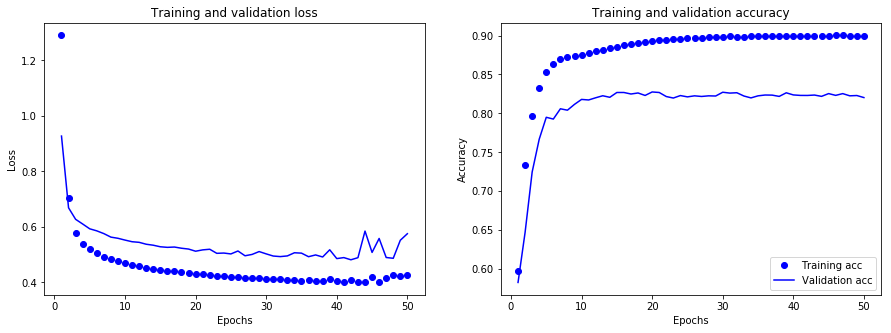

In [157]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['acc']
epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(epochs, loss_values, 'bo', label='Training loss') 
ax[0].plot(epochs, val_loss_values, 'b', label='Validation loss') 
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(epochs, acc_values, 'bo', label='Training acc')
ax[1].plot(epochs, val_acc_values, 'b', label='Validation acc')
ax[1].set_title('Training and validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
plt.legend()
plt.show()

# 2

In [158]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(MAX_WORD_LENGTH * CODE_LEN,),
                        kernel_regularizer=regularizers.l1_l2(l1_lambda)))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(layers.Dense(1, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=2**14,
                   validation_data=(x_validate, y_validate))

Train on 400000 samples, validate on 40000 samples
Epoch 1/50
400000/400000 [==============================] - 4s 11us/step - loss: 1.4742 - acc: 0.5618 - val_loss: 1.0530 - val_acc: 0.6775
Epoch 2/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.8404 - acc: 0.7148 - val_loss: 0.7313 - val_acc: 0.6894
Epoch 3/50
400000/400000 [==============================] - 3s 8us/step - loss: 0.6621 - acc: 0.7346 - val_loss: 0.6519 - val_acc: 0.7077
Epoch 4/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.5526 - acc: 0.7978 - val_loss: 0.6071 - val_acc: 0.7527
Epoch 5/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.4972 - acc: 0.8415 - val_loss: 0.5768 - val_acc: 0.7807
Epoch 6/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.4717 - acc: 0.8532 - val_loss: 0.5638 - val_acc: 0.7822
Epoch 7/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.4561 - acc: 0.8580 - val_loss: 0.5393 

No handles with labels found to put in legend.


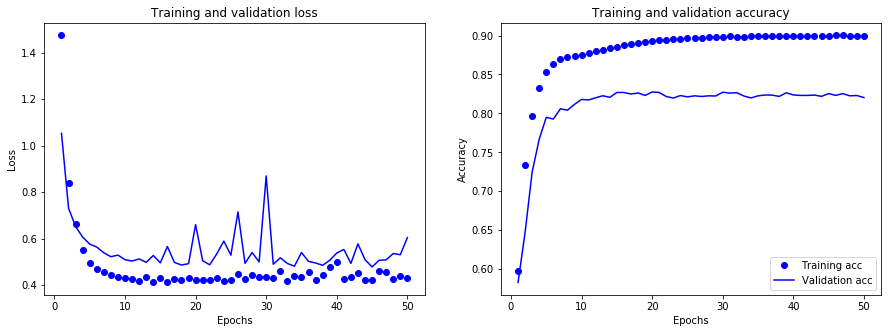

In [159]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['acc']
epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(epochs, loss_values, 'bo', label='Training loss') 
ax[0].plot(epochs, val_loss_values, 'b', label='Validation loss') 
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
plt.legend()

ax[1].plot(epochs, acc_values, 'bo', label='Training acc')
ax[1].plot(epochs, val_acc_values, 'b', label='Validation acc')
ax[1].set_title('Training and validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
plt.legend()
plt.show()

# 3

In [160]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(MAX_WORD_LENGTH * CODE_LEN,),
                        bias_regularizer=regularizers.l1(l1_lambda)))
model.add(layers.Dense(16, activation='relu', bias_regularizer=regularizers.l1(l1_lambda)))
model.add(layers.Dense(16, activation='relu', bias_regularizer=regularizers.l1(l1_lambda)))
model.add(layers.Dense(1, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=2**14,
                   validation_data=(x_validate, y_validate))

Train on 400000 samples, validate on 40000 samples
Epoch 1/50
400000/400000 [==============================] - 4s 11us/step - loss: 0.6890 - acc: 0.5909 - val_loss: 0.6857 - val_acc: 0.6019
Epoch 2/50
400000/400000 [==============================] - 3s 8us/step - loss: 0.6268 - acc: 0.7201 - val_loss: 0.5912 - val_acc: 0.7015
Epoch 3/50
400000/400000 [==============================] - 3s 8us/step - loss: 0.4031 - acc: 0.8196 - val_loss: 0.4521 - val_acc: 0.7848
Epoch 4/50
400000/400000 [==============================] - 3s 8us/step - loss: 0.2673 - acc: 0.8909 - val_loss: 0.3904 - val_acc: 0.8088
Epoch 5/50
400000/400000 [==============================] - 3s 8us/step - loss: 0.2107 - acc: 0.9176 - val_loss: 0.3542 - val_acc: 0.8333
Epoch 6/50
400000/400000 [==============================] - 3s 8us/step - loss: 0.1870 - acc: 0.9266 - val_loss: 0.3356 - val_acc: 0.8487
Epoch 7/50
400000/400000 [==============================] - 3s 7us/step - loss: 0.1655 - acc: 0.9364 - val_loss: 0.3309 

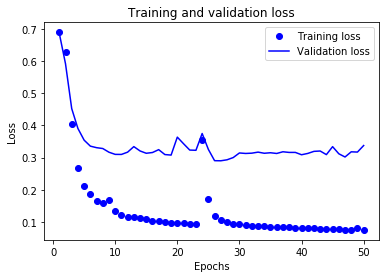

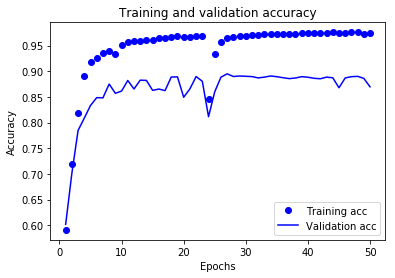

In [161]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

методы инициализации

# 1

In [125]:
from keras import initializers

In [162]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_initializer='random_normal', input_shape=(MAX_WORD_LENGTH * CODE_LEN,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu', kernel_initializer='random_normal'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='relu', kernel_initializer='random_normal'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=2**14,
                   validation_data=(x_validate, y_validate))

score = model.evaluate(x_validate, y_validate, batch_size=512)

Train on 400000 samples, validate on 40000 samples
Epoch 1/50
400000/400000 [==============================] - 5s 12us/step - loss: 0.6737 - acc: 0.6347 - val_loss: 0.6576 - val_acc: 0.6557
Epoch 2/50
400000/400000 [==============================] - 3s 9us/step - loss: 0.5958 - acc: 0.7821 - val_loss: 0.5845 - val_acc: 0.7419
Epoch 3/50
400000/400000 [==============================] - 3s 9us/step - loss: 0.5178 - acc: 0.8232 - val_loss: 0.5185 - val_acc: 0.7825
Epoch 4/50
400000/400000 [==============================] - 3s 9us/step - loss: 0.4563 - acc: 0.8435 - val_loss: 0.4778 - val_acc: 0.7875
Epoch 5/50
400000/400000 [==============================] - 3s 9us/step - loss: 0.4125 - acc: 0.8561 - val_loss: 0.4462 - val_acc: 0.8095
Epoch 6/50
400000/400000 [==============================] - 3s 9us/step - loss: 0.3839 - acc: 0.8645 - val_loss: 0.4256 - val_acc: 0.8097
Epoch 7/50
400000/400000 [==============================] - 3s 9us/step - loss: 0.3631 - acc: 0.8714 - val_loss: 0.4148 

No handles with labels found to put in legend.


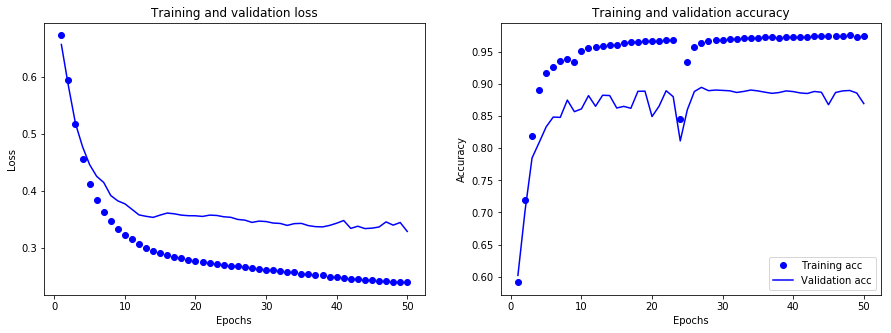

In [163]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['acc']
epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(epochs, loss_values, 'bo', label='Training loss') 
ax[0].plot(epochs, val_loss_values, 'b', label='Validation loss') 
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
plt.legend()

ax[1].plot(epochs, acc_values, 'bo', label='Training acc')
ax[1].plot(epochs, val_acc_values, 'b', label='Validation acc')
ax[1].set_title('Training and validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
plt.legend()
plt.show()

# 2

In [164]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', kernel_initializer='normal', input_shape=(MAX_WORD_LENGTH * CODE_LEN,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu', kernel_initializer='normal'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='relu', kernel_initializer='normal'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=2**14,
                   validation_data=(x_validate, y_validate))

score = model.evaluate(x_validate, y_validate, batch_size=512)

Train on 400000 samples, validate on 40000 samples
Epoch 1/50
400000/400000 [==============================] - 5s 13us/step - loss: 0.6789 - acc: 0.6530 - val_loss: 0.6568 - val_acc: 0.7700
Epoch 2/50
400000/400000 [==============================] - 4s 9us/step - loss: 0.6080 - acc: 0.7846 - val_loss: 0.5851 - val_acc: 0.7908
Epoch 3/50
400000/400000 [==============================] - 4s 9us/step - loss: 0.5193 - acc: 0.8261 - val_loss: 0.5207 - val_acc: 0.7804
Epoch 4/50
400000/400000 [==============================] - 4s 9us/step - loss: 0.4457 - acc: 0.8474 - val_loss: 0.4613 - val_acc: 0.8044
Epoch 5/50
400000/400000 [==============================] - 4s 9us/step - loss: 0.3911 - acc: 0.8629 - val_loss: 0.4220 - val_acc: 0.8150
Epoch 6/50
400000/400000 [==============================] - 4s 9us/step - loss: 0.3515 - acc: 0.8761 - val_loss: 0.3909 - val_acc: 0.8246
Epoch 7/50
400000/400000 [==============================] - 4s 9us/step - loss: 0.3232 - acc: 0.8860 - val_loss: 0.3684 

No handles with labels found to put in legend.


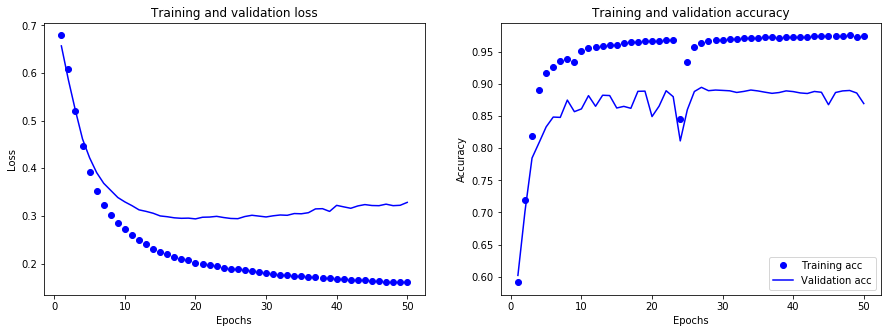

In [165]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['acc']
epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(epochs, loss_values, 'bo', label='Training loss') 
ax[0].plot(epochs, val_loss_values, 'b', label='Validation loss') 
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
plt.legend()

ax[1].plot(epochs, acc_values, 'bo', label='Training acc')
ax[1].plot(epochs, val_acc_values, 'b', label='Validation acc')
ax[1].set_title('Training and validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
plt.legend()
plt.show()